<a href="https://colab.research.google.com/github/Charanjeev-2k2/Instagram-Follower-Analysis/blob/main/Instagram_Follower_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/free4ever1/instagram-fake-spammer-genuine-accounts

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

Importing Data

In [ ]:
train = pd.read_csv('train.csv')
train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
train.shape

(576, 12)

In [ ]:
train.head(10)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
5,1,0.00,4,0.0,0,81,1,0,344,669987,150,0
6,1,0.00,2,0.0,0,50,0,0,16,122,177,0
7,1,0.00,2,0.0,0,0,0,0,33,1078,76,0
8,1,0.00,0,0.0,0,71,0,0,72,1824,2713,0
9,1,0.00,2,0.0,0,40,1,0,213,12945,813,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
#check null values
train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

#1

**Determining the maximum no. of followers possessed by a user belonging to the group of users with no profile picture**

In [ ]:
noprofile = train[train["profile pic"] == 0]
noprofile

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
174,0,0.00,0,0.00,0,14,0,1,131,533,1060,0
281,0,0.00,1,0.00,0,27,0,1,16,220,323,0
288,0,0.22,1,0.00,0,0,0,0,0,90,333,1
289,0,0.38,1,0.00,0,0,0,0,0,60,31,1
290,0,0.43,1,0.00,0,0,0,1,2,271,445,1
...,...,...,...,...,...,...,...,...,...,...,...,...
552,0,0.46,1,0.00,0,0,0,1,0,332,1333,1
553,0,0.73,1,0.00,0,0,0,0,0,14,542,1
556,0,0.31,1,0.31,1,0,0,0,0,26,27,1
561,0,0.86,2,0.18,0,0,0,0,0,57,130,1


In [ ]:
noprofile["#followers"].max()

3033

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


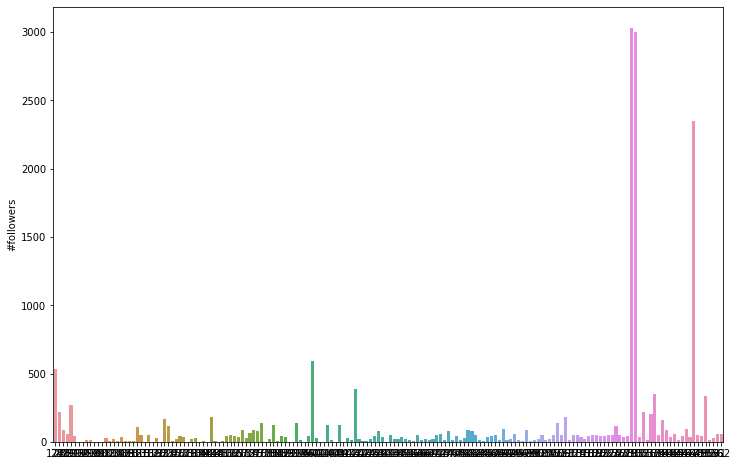

In [ ]:
#to indicate the max number of followers
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(noprofile.index, noprofile["#followers"])

#2

**Determining number of dead accounts**

In [ ]:
dead_accounts = train.loc[(train["profile pic"] == 0) & (train["description length"] == 0) & (train["#posts"] == 0)]
dead_accounts.shape[0]

123

#3

**Depicting who is expressive and who is not**

In [ ]:
#Added column "is expressive" with boolean values
train["is expressive"] = train["description length"].values > train["description length"].mean()

In [ ]:
train.head(10)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,is expressive
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0,True
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0,True
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0,False
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0,True
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0,False
5,1,0.00,4,0.0,0,81,1,0,344,669987,150,0,True
6,1,0.00,2,0.0,0,50,0,0,16,122,177,0,True
7,1,0.00,2,0.0,0,0,0,0,33,1078,76,0,False
8,1,0.00,0,0.0,0,71,0,0,72,1824,2713,0,True
9,1,0.00,2,0.0,0,40,1,0,213,12945,813,0,True


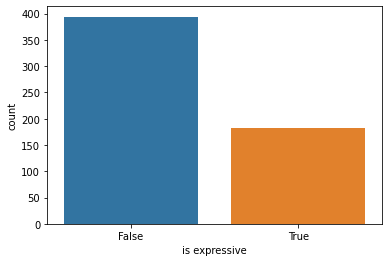

In [ ]:
import seaborn as sns
sns.countplot(x = "is expressive", data =train)

**Finding how expressive a person is by calculating percentage expressiveness**

In [ ]:
bio = train["description length"]

In [ ]:
percentage_expressiveness = pd.Series((bio - bio.mean())/ bio.mean())
percentage_expressiveness

0      1.342721
1      0.944901
2     -1.000000
3      2.624588
4     -1.000000
         ...   
571   -1.000000
572   -0.071752
573   -1.000000
574   -0.513775
575   -1.000000
Name: description length, Length: 576, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'percentage expressiveness')

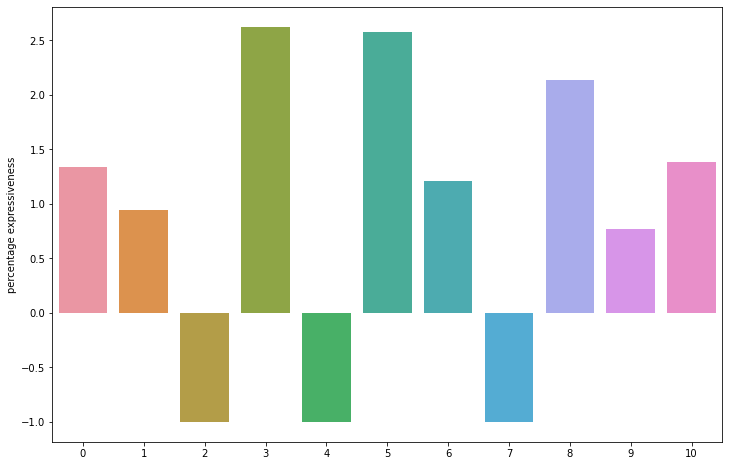

In [ ]:
#depicting percentage expressiveness of first 10 people
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(percentage_expressiveness.index[:11], percentage_expressiveness[:11])
plt.ylabel("percentage expressiveness")

#4

**Determining the maximum no. of followers possessed by a user among those who have 0 posts on their respective accounts.**

In [ ]:
noposts = train[train["#posts"] == 0]
noposts

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,is expressive
134,1,0.00,2,0.00,0,0,0,0,0,192,65,0,False
166,1,0.00,1,0.00,0,26,0,1,0,114,446,0,True
241,1,0.00,2,0.00,0,0,0,0,0,96,50,0,False
252,1,0.00,2,0.00,0,0,0,1,0,13,77,0,False
288,0,0.22,1,0.00,0,0,0,0,0,90,333,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,1,0.43,1,0.43,0,0,0,0,0,72,434,1,False
561,0,0.86,2,0.18,0,0,0,0,0,57,130,1,False
562,0,0.62,1,0.00,0,0,0,1,0,58,347,1,False
570,1,0.20,1,0.00,0,28,0,0,0,15,64,1,True


In [ ]:
noposts["#followers"].max()

3033

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


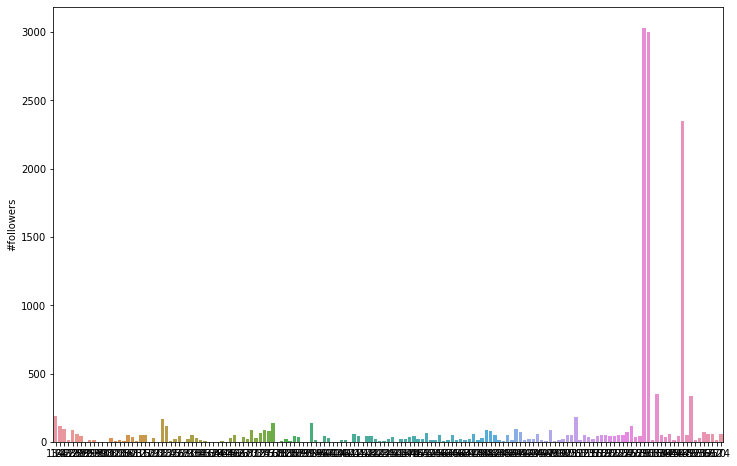

In [ ]:
#depicting max value
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(noposts.index, noposts["#followers"])

#5

**Ratio of number of followers (#followers) to number of following (#follows) 
for the user with the maximum number of following**

In [ ]:
train["ratio"] = train["#followers"]/ train["#follows"]
index = train[train["#follows"] == train["#follows"].max()].index
index = pd.Series(index)
ratio = train["ratio"]
for i in index.index:
  print(ratio[index[i]])

0.1844
0.23666666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


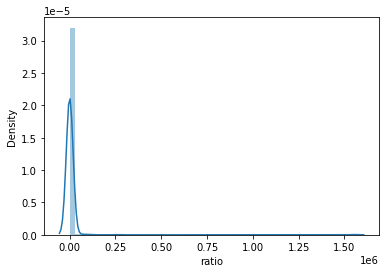

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


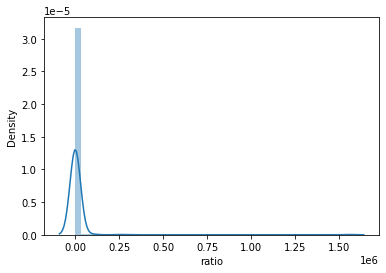

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


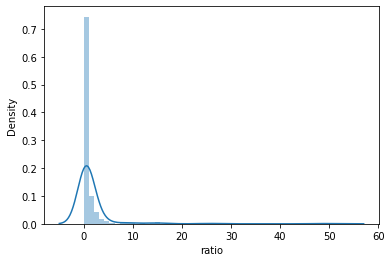

In [ ]:
fake = train.loc[(train["fake"] == 1) & (train["#follows"] != 0)]
non_fake = train.loc[(train["#follows"] != 0) & (train["fake"] == 0)]
all = train.loc[(train["#follows"] != 0)]

sns.distplot(all["ratio"])
plt.show()
sns.distplot(non_fake["ratio"])
plt.show()
sns.distplot(fake["ratio"])
plt.show()